### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir()

['.~Book1__42404.twbr',
 'E-Commerce-Dataset.ipynb',
 'Dashboard.png',
 '.DS_Store',
 'cleaned_data.csv',
 '.E-Commerce-Dataset.ipynb.layout',
 '.ipynb_checkpoints',
 'E-Commerce-Dataset.twb',
 'ecommerce_dataset_updated.csv']

# Dataset Overview

In [6]:
# –∑—á–∏—Ç—É—î–º–æ –¥–∞–Ω—ñ —É –¥–∞—Ç–∞—Ñ—Ä–µ–π–º

df = pd.read_csv('ecommerce_dataset_updated.csv')
df.head()

User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0             31.05    Net Banking    12-11-2024  
1            186.23    Net Banking    09-02-2024  
2            237.76    Credit Card    01-09-2024  
3            129.89            UPI    01-04-2024  
4            195.84    Net Banking    27-09-2024

In [8]:
# –∑–Ω–∞–π–æ–º–∏–º–æ—Å—å –∑ –¥–∞–Ω–∏–º–∏, –Ω–∞–∑–≤–∞–º–∏ –∫–æ–ª–æ–Ω–æ–∫ —Ç–∞ —Ç–∏–ø–∞–º–∏ –¥–∞–Ω–∏—Ö
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [10]:
# —Ä–æ–∑–º—ñ—Ä –¥–∞—Ç–∞—Å–µ—Ç—É
df.shape

(3660, 8)

In [12]:
df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9])

Price (Rs.)  Discount (%)  Final_Price(Rs.)
count  3660.000000   3660.000000       3660.000000
mean    254.800675     18.825137        206.906579
std     141.682621     14.731338        122.687844
min      10.090000      0.000000          5.890000
1%       14.633600      0.000000         11.462600
10%      56.085000      0.000000         44.281000
25%     134.012500      5.000000        104.512500
50%     253.845000     15.000000        199.185000
75%     377.595000     25.000000        304.117500
90%     450.532000     50.000000        379.114000
max     499.960000     50.000000        496.820000

# Data Cleaning and Preprocessing

In [15]:
# –ø–µ—Ä–µ–≤—ñ—Ä—è—î–º–æ –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ null (–Ω–∞—è–≤–Ω—ñ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å)
df.isnull().sum()

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

–î–∞—Ç–∞—Å–µ—Ç –Ω–µ –º—ñ—Å—Ç–∏—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å.

In [18]:
# –ø–µ—Ä–µ–≤—ñ—Ä—è—î–º–æ –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ –¥—É–±–ª—ñ–∫–∞—Ç–∏
sum(df.duplicated())

0

–î–∞—Ç–∞—Å–µ—Ç –Ω–µ –º—ñ—Å—Ç–∏—Ç—å –¥—É–±–ª—ñ–∫–∞—Ç—ñ–≤.

In [21]:
# –ø–µ—Ä–µ–≤—ñ—Ä–∫–∏ —á–∏—Å–ª–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫ –Ω–∞ –≤—ñ–¥ º—î–º–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è
invalid_prices = df[
   (df['Price (Rs.)'] < 0) | 
   (df['Discount (%)'] < 0) |
   (df['Final_Price(Rs.)'] < 0)
]
print(invalid_prices)

Empty DataFrame
Columns: [User_ID, Product_ID, Category, Price (Rs.), Discount (%), Final_Price(Rs.), Payment_Method, Purchase_Date]
Index: []


–î–∞—Ç–∞—Å–µ—Ç –Ω–µ –º—ñ—Å—Ç–∏—Ç—å –≤—ñ–¥ º—î–º–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å.

In [24]:
# –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—è –Ω–∞–∑–≤ –∫–æ–ª–æ–Ω–æ–∫ –¥–æ —É–Ω—ñ—Ñ—ñ–∫–æ–≤–∞–Ω–æ–≥–æ –≤–∏–¥—É
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date'],
      dtype='object')

In [26]:
df.columns = (df.columns
              .str.lower()
              .str.replace(r'\(.*\)', '', regex=True)
              .str.strip()
             )
df.columns

Index(['user_id', 'product_id', 'category', 'price', 'discount', 'final_price',
       'payment_method', 'purchase_date'],
      dtype='object')

# Exploratory Data Analysis (EDA)

## 1. –ê–Ω–∞–ª—ñ–∑ –ø—Ä–æ–¥–∞–∂—ñ–≤ —Ç–æ–≤–∞—Ä—ñ–≤

- –Ø–∫—ñ —Ç–æ–≤–∞—Ä–∏ –ø—Ä–∏–Ω–æ—Å—è—Ç—å –Ω–∞–π–±—ñ–ª—å—à–∏–π –¥–æ—Ö—ñ–¥/–ø—Ä–æ–¥–∞—é—Ç—å—Å—è –Ω–∞–π–∫—Ä–∞—â–µ?
- –Ø–∫—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó —Ç–æ–≤–∞—Ä—ñ–≤ –ø—Ä–æ–¥–∞—é—Ç—å—Å—è –Ω–∞–π–∫—Ä–∞—â–µ –≤ —Ä—ñ–∑–Ω—ñ –ø–µ—Ä—ñ–æ–¥–∏ —Ä–æ–∫—É?
- –ß–∏ —î —Å–µ–∑–æ–Ω–Ω—ñ –∫–æ–ª–∏–≤–∞–Ω–Ω—è –≤ –ø—Ä–æ–¥–∞–∂–∞—Ö?

In [30]:
# –≥—Ä—É–ø—É–≤–∞–Ω–Ω—è –∑–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—î—é —Ç–∞ –æ–±—á–∏—Å–ª–µ–Ω–Ω—è —Å—É–º–∞—Ä–Ω–æ–≥–æ –¥–æ—Ö–æ–¥—É
category_revenue = df.groupby('category')['final_price'].sum()

# —Å–æ—Ä—Ç—É–≤–∞–Ω–Ω—è –∑–∞ —Å–ø–∞–¥–∞–Ω–Ω—è–º —Ç–∞ –ø–æ—à—É–∫ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –∑ –Ω–∞–π–±—ñ–ª—å—à–∏–º –¥–æ—Ö–æ–¥–æ–º
top_category = category_revenue.sort_values(ascending=False).reset_index()

top_category

category  final_price
0        Clothing    115314.84
1           Books    111149.35
2  Home & Kitchen    110328.08
3          Sports    108518.79
4            Toys    107289.69
5          Beauty    104215.10
6     Electronics    100462.23

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ö–∞—Ç–µ–≥–æ—Ä—ñ—è —Ç–æ–≤–∞—Ä—ñ–≤ `–û–¥—è–≥` —î –ª—ñ–¥–µ—Ä–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤ —Ç–∞ –ø—Ä–∏–Ω–æ—Å–∏—Ç—å –Ω–∞–π–±—ñ–ª—å—à–∏–π –¥–æ—Ö—ñ–¥ ‚Äì 115 314,84. –ù–∞–π–º–µ–Ω—à–∏–π –ø—Ä–∏–±—É—Ç–æ–∫ –∑–∞–±–µ–∑–ø–µ—á—É—î –∫–∞—Ç–µ–≥–æ—Ä—ñ—è `–ï–ª–µ–∫—Ç—Ä–æ–Ω—ñ–∫–∞` ‚Äì 100 462,23. –¶–µ –º–æ–∂–µ –±—É—Ç–∏ –∑—É–º–æ–≤–ª–µ–Ω–æ —Ç–∏–º, —â–æ –æ–¥—è–≥ –∫—É–ø—É—é—Ç—å —á–∞—Å—Ç—ñ—à–µ —á–µ—Ä–µ–∑ –Ω–µ–æ–±—Ö—ñ–¥–Ω—ñ—Å—Ç—å –æ–Ω–æ–≤–ª–µ–Ω–Ω—è –≥–∞—Ä–¥–µ—Ä–æ–±—É —Ç–∞ –π–æ–≥–æ –≤—ñ–¥–Ω–æ—Å–Ω—É –¥–æ—Å—Ç—É–ø–Ω—ñ—Å—Ç—å —É –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—ñ –∑ —Ç–µ—Ö–Ω—ñ–∫–æ—é. –í–æ–¥–Ω–æ—á–∞—Å –µ–ª–µ–∫—Ç—Ä–æ–Ω—ñ–∫–∞ —î –¥–æ—Ä–æ–∂—á–æ—é —Ç–∞ –∫—É–ø—É—î—Ç—å—Å—è —Ä—ñ–¥—à–µ, –æ—Å–∫—ñ–ª—å–∫–∏ –ø—Ä–∏—Å—Ç—Ä–æ—ó –∑–∞–∑–≤–∏—á–∞–π –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—Ç—å—Å—è –ø—Ä–æ—Ç—è–≥–æ–º —Ç—Ä–∏–≤–∞–ª–æ–≥–æ —á–∞—Å—É.

–ü–æ—Ä–∞—Ö—É—î–º–æ —Å—É–º–∞—Ä–Ω–∏–π –¥–æ—Ö—ñ–¥ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ –º—ñ—Å—è—Ü—è–º–∏

In [34]:
# –ø–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è —É —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç–∏ —Ç–∞ —Å—Ç–≤–æ—Ä–µ–Ω–Ω—è –Ω–æ–≤–∏—Ö –∫–æ–ª–æ–Ω–æ–∫
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format="%d-%m-%Y", errors='coerce')

df['month'] = df['purchase_date'].dt.month

In [36]:
monthly_sales_total_pivot = df.pivot_table(index='month', columns='category', values='final_price', aggfunc='sum', fill_value=0)

monthly_sales_total_pivot

category    Beauty     Books  Clothing  Electronics  Home & Kitchen    Sports  \
month                                                                           
1         10909.32   8858.16  10664.28      8439.91        10421.69   9981.53   
2         12039.20   7516.03  10471.59     11238.46        10338.02  10225.61   
3         11088.45   8495.20  12820.30      8216.37        10063.40  12143.32   
4          8542.71   9346.81  15876.86      7747.77        11814.25  11756.67   
5         10688.15  10194.79   8243.46      9453.03         8723.17  11395.04   
6          5934.21   8916.94   8109.12     11638.59         8029.62   8237.01   
7          8895.84  11455.91   9840.52     10889.77        10670.41  10840.61   
8          8106.25  10437.67   8853.21     10592.97        12812.65   8928.81   
9         11429.78  11260.05   9351.98      5321.05        11340.52   9594.97   
10         9977.46  15271.10  11994.27     11613.64         9040.88   8730.58   
11         6603.73   9396.69   9089.25      5310.67         7073.47   6684.64   

category      Toys  
month               
1          9734.54  
2          7357.43  
3          8498.36  
4          9280.06  
5         10139.61  
6         13391.17  
7         10205.17  
8         11775.40  
9          9744.74  
10         9406.58  
11         7756.63

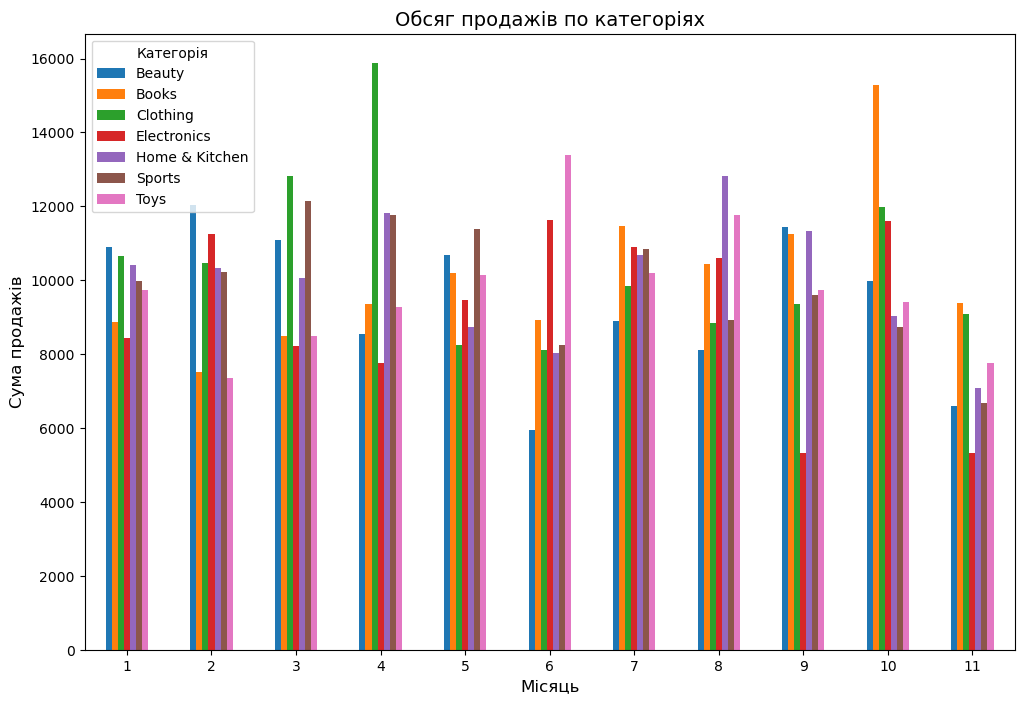

In [38]:
monthly_sales_total_pivot.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('–û–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö', fontsize=14)
plt.xlabel('–ú—ñ—Å—è—Ü—å', fontsize=12)
plt.ylabel('–°—É–º–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤', fontsize=12)
plt.legend(title='–ö–∞—Ç–µ–≥–æ—Ä—ñ—è')
plt.xticks(rotation=0)
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ó –≥—Ä–∞—Ñ—ñ–∫–∞ –≤–∏–¥–Ω–æ, —â–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è `–û–¥—è–≥` –º–∞—î –ø—ñ–∫–æ–≤—ñ –ø—Ä–æ–¥–∞–∂—ñ –Ω–∞–≤–µ—Å–Ω—ñ ‚Äî —É –±–µ—Ä–µ–∑–Ω—ñ —Ç–∞ –∫–≤—ñ—Ç–Ω—ñ. –¶–µ –º–æ–∂–µ –±—É—Ç–∏ –∑—É–º–æ–≤–ª–µ–Ω–æ –æ–Ω–æ–≤–ª–µ–Ω–Ω—è–º –≥–∞—Ä–¥–µ—Ä–æ–±—É –¥–æ —Ç–µ–ø–ª–æ–≥–æ —Å–µ–∑–æ–Ω—É —Ç–∞ –±–∞–∂–∞–Ω–Ω—è–º –≤–∏–≥–ª—è–¥–∞—Ç–∏ —Å—É—á–∞—Å–Ω–æ —Ç–∞ –ø–æ-–Ω–æ–≤–æ–º—É. –¢–∞–∫–æ–∂ –≤–µ—Å–Ω—è–Ω—ñ —Ä–æ–∑–ø—Ä–æ–¥–∞–∂—ñ —Ç–∞ –∞–∫—Ü—ñ—ó –º–æ–∂—É—Ç—å –¥–æ–¥–∞—Ç–∫–æ–≤–æ —Å—Ç–∏–º—É–ª—é–≤–∞—Ç–∏ –ø–æ–∫—É–ø–∫–∏.

–ù–∞—Ç–æ–º—ñ—Å—Ç—å –∫–∞—Ç–µ–≥–æ—Ä—ñ—è `–ö–Ω–∏–≥–∏` –¥–µ–º–æ–Ω—Å—Ç—Ä—É—î –Ω–∞–π–±—ñ–ª—å—à–∏–π –ø–æ–ø–∏—Ç –≤–æ—Å–µ–Ω–∏, –∑–æ–∫—Ä–µ–º–∞ –≤ –∂–æ–≤—Ç–Ω—ñ. –¶–µ –º–æ–∂–µ –±—É—Ç–∏ –ø–æ–≤'—è–∑–∞–Ω–æ –∑ –ø–æ—á–∞—Ç–∫–æ–º –Ω–∞–≤—á–∞–ª—å–Ω–æ–≥–æ —Ä–æ–∫—É, –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—é —á–∏—Ç–∞–Ω–Ω—è –≤ –∑–∞—Ç–∏—à–Ω–∏–π –æ—Å—ñ–Ω–Ω—ñ–π —Å–µ–∑–æ–Ω —Ç–∞ –ø—ñ–¥–≥–æ—Ç–æ–≤–∫–æ—é –¥–æ –∑–∏–º–æ–≤–∏—Ö —Å–≤—è—Ç.

–¢–∞–∫—ñ —Ç–µ–Ω–¥–µ–Ω—Ü—ñ—ó –¥–æ–ø–æ–º–∞–≥–∞—é—Ç—å –∫—Ä–∞—â–µ –ø–ª–∞–Ω—É–≤–∞—Ç–∏ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ñ –∫–∞–º–ø–∞–Ω—ñ—ó —Ç–∞ –∞–∫—Ü—ñ—ó –∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥ —Å–µ–∑–æ–Ω—É, —â–æ —Å–ø—Ä–∏—è—Ç–∏–º–µ –∑–±—ñ–ª—å—à–µ–Ω–Ω—é –ø—Ä–æ–¥–∞–∂—ñ–≤.

## 2. –ê–Ω–∞–ª—ñ–∑ –æ–±—Å—è–≥—É –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –º—ñ—Å—è—Ü—è–º–∏

In [42]:
monthly_sales_by_month = df.groupby('month')['final_price'].sum()

monthly_sales_by_month.sort_values(ascending=False).reset_index()

month  final_price
0      10     76034.51
1       4     74365.13
2       7     72798.23
3       8     71506.96
4       3     71325.40
5       2     69186.34
6       1     69009.43
7       5     68837.25
8       9     68043.09
9       6     64256.66
10     11     51915.08

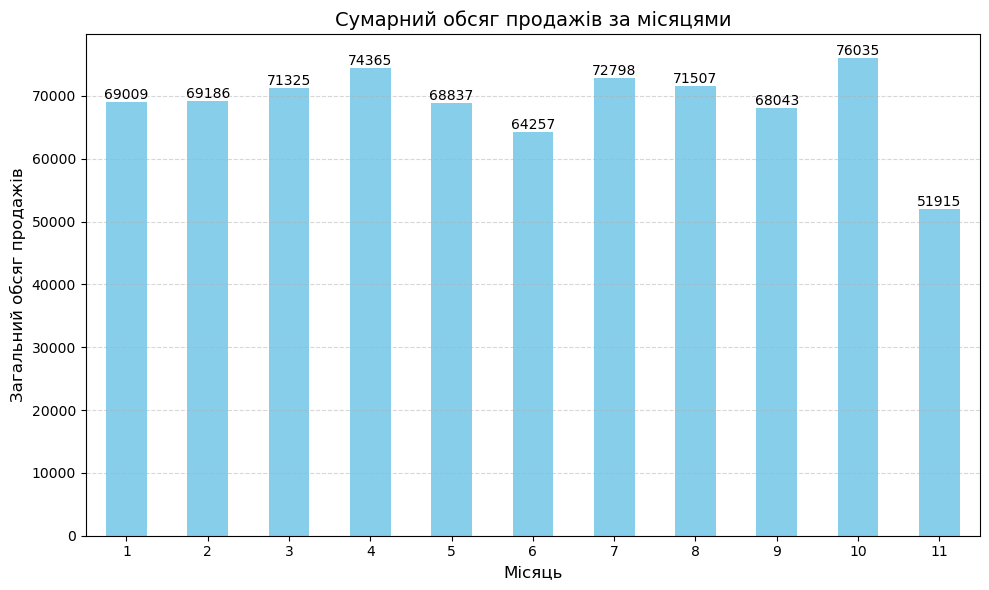

In [44]:
plt.figure(figsize=(10, 6))
monthly_sales_by_month.plot(kind='bar', color='skyblue')
plt.title('–°—É–º–∞—Ä–Ω–∏–π –æ–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –º—ñ—Å—è—Ü—è–º–∏', fontsize=14)
plt.xlabel('–ú—ñ—Å—è—Ü—å', fontsize=12)
plt.ylabel('–ó–∞–≥–∞–ª—å–Ω–∏–π –æ–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)

for index, value in enumerate(monthly_sales_by_month):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10, fontweight='medium')

plt.tight_layout()
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ê–Ω–∞–ª—ñ–∑ –æ–±—Å—è–≥—É –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ–∫–∞–∑–∞–≤, —â–æ –Ω–∞–π–±—ñ–ª—å—à–∏–π –¥–æ—Ö—ñ–¥ –±—É–ª–æ –æ—Ç—Ä–∏–º–∞–Ω–æ —É –∫–≤—ñ—Ç–Ω—ñ —Ç–∞ –∂–æ–≤—Ç–Ω—ñ 2024 —Ä–æ–∫—É, –∑–∞ –Ω–∏–º–∏ –π–¥—É—Ç—å –ª–∏–ø–µ–Ω—å —Ç–∞ —Å–µ—Ä–ø–µ–Ω—å. –ó–∞–≥–∞–ª–æ–º, –æ–±—Å—è–≥–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø—Ä–æ—Ç—è–≥–æ–º —Ä–æ–∫—É –∑–∞–ª–∏—à–∞—é—Ç—å—Å—è —Å—Ç–∞–±—ñ–ª—å–Ω–∏–º–∏, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –≤—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å –≤–∏—Ä–∞–∂–µ–Ω–æ—ó —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—ñ. –ú–æ–∂–Ω–∞ –ø—Ä–∏–ø—É—Å—Ç–∏—Ç–∏, —â–æ –∞—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç —Ç–æ–≤–∞—Ä—ñ–≤ –¥–æ–±—Ä–µ –∑–±–∞–ª–∞–Ω—Å–æ–≤–∞–Ω–∏–π —Ç–∞ –≤—ñ–¥–ø–æ–≤—ñ–¥–∞—î –ø–æ–ø–∏—Ç—É –≤ —Ä—ñ–∑–Ω—ñ –ø–µ—Ä—ñ–æ–¥–∏ —Ä–æ–∫—É.

–ù–∞ –≥—Ä–∞—Ñ—ñ–∫—É —Ç–∞–∫–æ–∂ –≤–∏–¥–Ω–æ –∑–Ω–∞—á–Ω–µ –∑–º–µ–Ω—à–µ–Ω–Ω—è –ø—Ä–æ–¥–∞–∂—ñ–≤ —É –ª–∏—Å—Ç–æ–ø–∞–¥—ñ. –ô–º–æ–≤—ñ—Ä–Ω–æ—é –ø—Ä–∏—á–∏–Ω–æ—é —Ü—å–æ–≥–æ –º–æ–∂–µ –±—É—Ç–∏ –Ω–µ–ø–æ–≤–Ω–∞ –≤–∏–±—ñ—Ä–∫–∞ –¥–∞–Ω–∏—Ö –∑–∞ –º—ñ—Å—è—Ü—å –∞–±–æ —ñ–Ω—à—ñ —Ñ–∞–∫—Ç–æ—Ä–∏, —â–æ –ø–æ—Ç—Ä–µ–±—É—é—Ç—å –¥–æ–¥–∞—Ç–∫–æ–≤–æ–≥–æ –∞–Ω–∞–ª—ñ–∑—É. –í—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å –¥–∞–Ω–∏—Ö –∑–∞ –≥—Ä—É–¥–µ–Ω—å –Ω–µ –¥–æ–∑–≤–æ–ª—è—î –∑—Ä–æ–±–∏—Ç–∏ –ø–æ–≤–Ω–æ—Ü—ñ–Ω–Ω–∏–π –≤–∏—Å–Ω–æ–≤–æ–∫ —â–æ–¥–æ —Ä—ñ—á–Ω–æ—ó –¥–∏–Ω–∞–º—ñ–∫–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤.

–©–æ–± –ø—ñ–¥—Ç–≤–µ—Ä–¥–∏—Ç–∏ –ø—Ä–∏–ø—É—â–µ–Ω–Ω—è, –≤–∞—Ä—Ç–æ –ø—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–≤–∞—Ç–∏ –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π —É –ª–∏—Å—Ç–æ–ø–∞–¥—ñ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ —ñ–Ω—à–∏–º–∏ –º—ñ—Å—è—Ü—è–º–∏. –¶–µ –¥–æ–ø–æ–º–æ–∂–µ –∑—Ä–æ–∑—É–º—ñ—Ç–∏, —á–∏ –ø–æ–≤'—è–∑–∞–Ω–µ –∑–Ω–∏–∂–µ–Ω–Ω—è –æ–±—Å—è–≥—É –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑—ñ –∑–º–µ–Ω—à–µ–Ω–Ω—è–º –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –æ–ø–µ—Ä–∞—Ü—ñ–π –∞–±–æ –∑ —ñ–Ω—à–∏–º–∏ —á–∏–Ω–Ω–∏–∫–∞–º–∏.

In [47]:
transactions_per_month = df.groupby('month')['final_price'].count().reset_index(name='transaction_count')

transactions_per_month

month  transaction_count
0       1                340
1       2                308
2       3                355
3       4                362
4       5                333
5       6                323
6       7                346
7       8                344
8       9                342
9      10                362
10     11                245

In [49]:
transactions_per_month.mean()

month                  6.000000
transaction_count    332.727273
dtype: float64

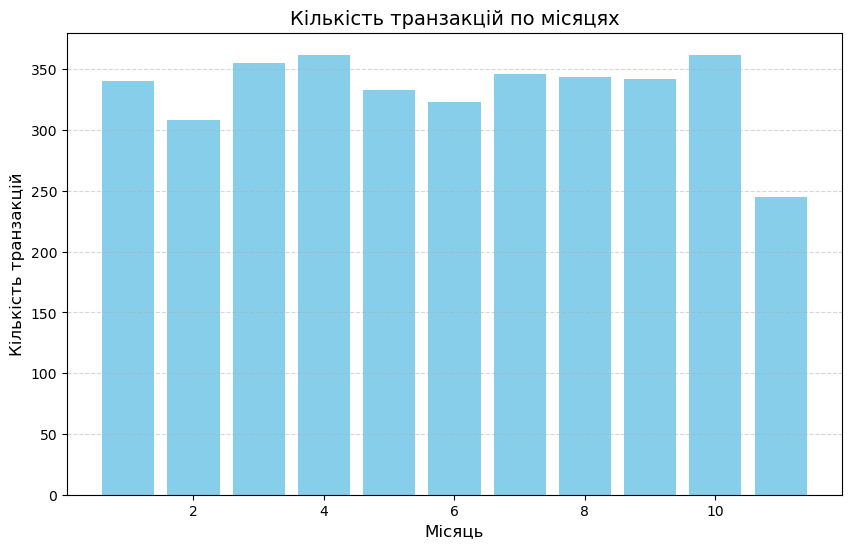

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_month['month'], transactions_per_month['transaction_count'], color='skyblue')
plt.xlabel('–ú—ñ—Å—è—Ü—å', fontsize=12)
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π', fontsize=12)
plt.title('–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π –ø–æ –º—ñ—Å—è—Ü—è—Ö', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π —É –ª–∏—Å—Ç–æ–ø–∞–¥—ñ –¥—ñ–π—Å–Ω–æ –∑–Ω–∞—á–Ω–æ –º–µ–Ω—à–∞ ‚Äî –ª–∏—à–µ 245, —Ç–æ–¥—ñ —è–∫ —Å–µ—Ä–µ–¥–Ω—è –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π –∑–∞ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ –º—ñ—Å—è—Ü—ñ —Å—Ç–∞–Ω–æ–≤–∏–ª–∞ –±–ª–∏–∑—å–∫–æ 332. –¢–æ–º—É –º–æ–∂–Ω–∞ —Å–º—ñ–ª–∏–≤–æ —Å—Ç–≤–µ—Ä–¥–∂—É–≤–∞—Ç–∏, —â–æ –¥–∞–Ω—ñ –∑–∞ –ª–∏—Å—Ç–æ–ø–∞–¥ —î –Ω–µ–ø–æ–≤–Ω–∏–º–∏, —â–æ —É—Å–∫–ª–∞–¥–Ω—é—î —Ñ–æ—Ä–º—É–≤–∞–Ω–Ω—è —Ç–æ—á–Ω–∏—Ö –≤–∏—Å–Ω–æ–≤–∫—ñ–≤ —â–æ–¥–æ —Ç–µ–Ω–¥–µ–Ω—Ü—ñ–π –ø—Ä–æ–¥–∞–∂—ñ–≤ —Å–∞–º–µ –≤ —Ü—å–æ–º—É –º—ñ—Å—è—Ü—ñ.

In [54]:
monthly_sales = df.pivot_table(
    values='final_price', 
    index='category', 
    columns='month', 
    aggfunc='sum',
    fill_value=0
)

–ü–æ–±—É–¥—É—î–º–æ —â–µ –æ–¥–∏–Ω –≥—Ä–∞—Ñ—ñ–∫ –¥–ª—è –Ω–∞–æ—á–Ω–æ–≥–æ –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –ø–µ—Ä—ñ–æ–¥–∞–º–∏.

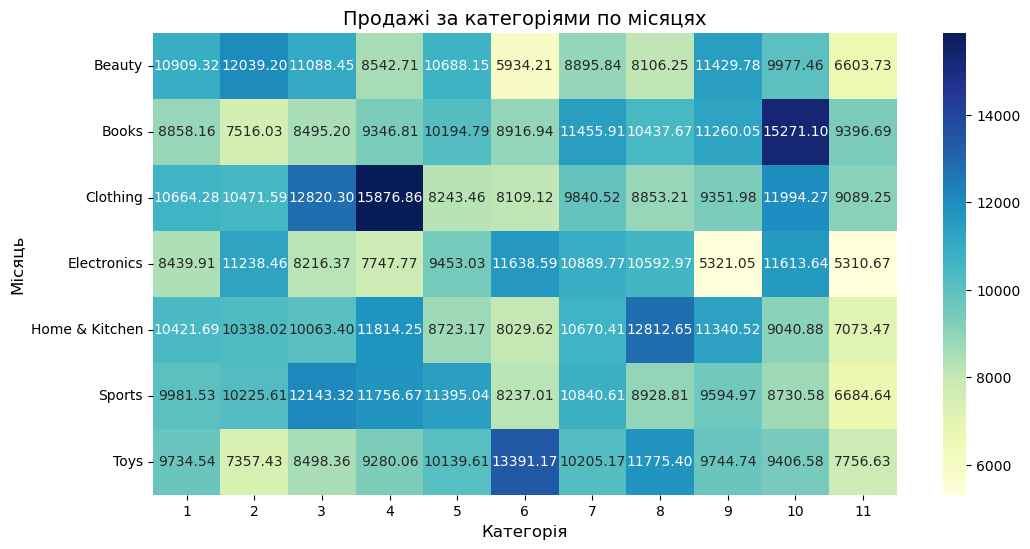

In [57]:
# –∞–Ω–∞–ª—ñ–∑ –∑–∞ –º—ñ—Å—è—Ü—è–º–∏

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_sales, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("–ü—Ä–æ–¥–∞–∂—ñ –∑–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è–º–∏ –ø–æ –º—ñ—Å—è—Ü—è—Ö", fontsize=14)
plt.xlabel("–ö–∞—Ç–µ–≥–æ—Ä—ñ—è", fontsize=12)
plt.ylabel("–ú—ñ—Å—è—Ü—å", fontsize=12)
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ó —Ç–µ–ø–ª–æ–≤–æ—ó –∫–∞—Ä—Ç–∏ –≤–∏–¥–Ω–æ, —â–æ –Ω–∞–π–±—ñ–ª—å—à–∏–π –ø—Ä–∏–±—É—Ç–æ–∫ –∑–∞–±–µ–∑–ø–µ—á–∏–ª–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è `–û–¥—è–≥` —É –∫–≤—ñ—Ç–Ω—ñ —Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è `–ö–Ω–∏–≥–∏` —É –∂–æ–≤—Ç–Ω—ñ, —è–∫ –≤–∂–µ –≤—ñ–¥–∑–Ω–∞—á–∞–ª–æ—Å—è —Ä–∞–Ω—ñ—à–µ. –ù–∞–π–º–µ–Ω—à –ø—Ä–∏–±—É—Ç–∫–æ–≤–∏–º–∏ –≤–∏—è–≤–∏–ª–∏—Å—è –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó `–ï–ª–µ–∫—Ç—Ä–æ–Ω—ñ–∫–∞` —É –≤–µ—Ä–µ—Å–Ω—ñ —Ç–∞ –ª–∏—Å—Ç–æ–ø–∞–¥—ñ, –∞ —Ç–∞–∫–æ–∂ `–ö—Ä–∞—Å–∞` —É —á–µ—Ä–≤–Ω—ñ —Ç–∞ –ª–∏—Å—Ç–æ–ø–∞–¥—ñ. –†–µ—à—Ç–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –¥–µ–º–æ–Ω—Å—Ç—Ä—É—é—Ç—å —Å—Ç–∞–±—ñ–ª—å–Ω—ñ –ø–æ–∫–∞–∑–Ω–∏–∫–∏ –ø—Ä–∏–±—É—Ç–∫—É —Ç–∞ —Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–æ —Ä–æ–∑–ø–æ–¥—ñ–ª—è—é—Ç—å—Å—è –∑–∞ –º—ñ—Å—è—Ü—è–º–∏.

## 3. –†–æ–∑–ø–æ–¥—ñ–ª –∫—ñ–ª—å–∫–æ—Å—Ç—ñ —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π –∑–∞ –º–µ—Ç–æ–¥–∞–º–∏ –æ–ø–ª–∞—Ç–∏
- –Ø–∫–∏–π —Å–ø–æ—Å—ñ–± –æ–ø–ª–∞—Ç–∏ –Ω–∞–π–ø–æ–ø—É–ª—è—Ä–Ω—ñ—à–∏–π?

In [61]:
# –ø—ñ–¥—Ä–∞—Ö—É–Ω–æ–∫ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π –∑–∞ –∫–æ–∂–Ω–∏–º –º–µ—Ç–æ–¥–æ–º –æ–ø–ª–∞—Ç–∏

payment_method_counts = df['payment_method'].value_counts()

In [63]:
payment_method_counts

Credit Card         760
UPI                 757
Debit Card          731
Net Banking         716
Cash on Delivery    696
Name: payment_method, dtype: int64

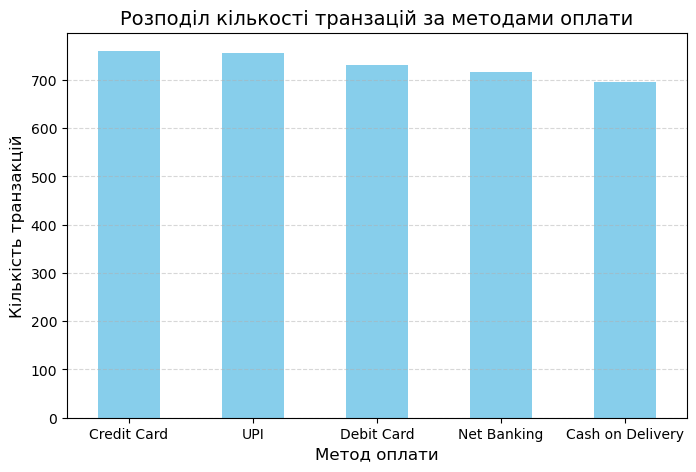

In [65]:
plt.figure(figsize=(8, 5))
payment_method_counts.plot(kind='bar', color='skyblue')
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –∫—ñ–ª—å–∫–æ—Å—Ç—ñ —Ç—Ä–∞–Ω–∑–∞—Ü—ñ–π –∑–∞ –º–µ—Ç–æ–¥–∞–º–∏ –æ–ø–ª–∞—Ç–∏", fontsize=14)
plt.xlabel("–ú–µ—Ç–æ–¥ –æ–ø–ª–∞—Ç–∏", fontsize=12)
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

## 4. –†–æ–∑–ø–æ–¥—ñ–ª –ø—Ä–∏–±—É—Ç–∫—É –∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥ –º–µ—Ç–æ–¥—É –æ–ø–ª–∞—Ç–∏

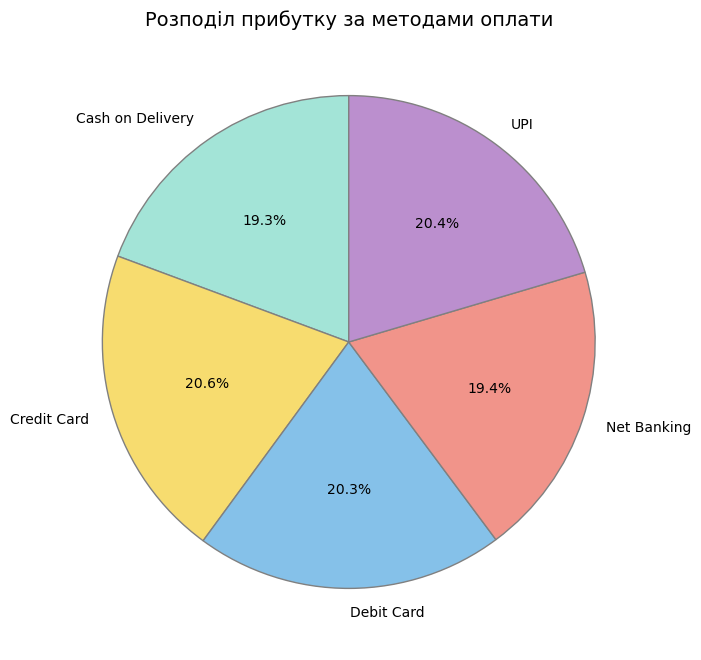

In [68]:
# —Ä–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –ø—Ä–∏–±—É—Ç–∫—É –∑–∞ –º–µ—Ç–æ–¥–∞–º–∏ –æ–ø–ª–∞—Ç–∏
payment_method_revenue = df.groupby('payment_method')['final_price'].sum()
payment_method_revenue_percentage = (payment_method_revenue / payment_method_revenue.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(payment_method_revenue_percentage, 
        labels=payment_method_revenue_percentage.index,
        autopct='%1.1f%%',
        colors=['#A3E4D7', '#F7DC6F', '#85C1E9', '#F1948A', '#BB8FCE'],
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'grey'})

plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –ø—Ä–∏–±—É—Ç–∫—É –∑–∞ –º–µ—Ç–æ–¥–∞–º–∏ –æ–ø–ª–∞—Ç–∏", fontsize=14)
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ë—ñ–ª—å—à—ñ—Å—Ç—å –º–µ—Ç–æ–¥—ñ–≤ –æ–ø–ª–∞—Ç–∏ –º–∞—é—Ç—å –ø—Ä–∏–±–ª–∏–∑–Ω–æ –æ–¥–Ω–∞–∫–æ–≤—É —á–∞—Å—Ç–∫—É (–±–ª–∏–∑—å–∫–æ 20%) —Ç–∞ –æ–¥–Ω–∞–∫–æ–≤—É –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å. –í–∏–Ω—è—Ç–∫–æ–º —î Cash on Delivery (19,3%) —Ç–∞ Net Banking (19,4%), —è–∫—ñ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—Ç—å—Å—è —Ç—Ä–æ—Ö–∏ —Ä—ñ–¥—à–µ. –û—Ç–∂–µ, —Å–µ—Ä–µ–¥ –∫–ª—ñ—î–Ω—Ç—ñ–≤ –Ω–µ–º–∞—î —á—ñ—Ç–∫–æ –≤–∏—Ä–∞–∂–µ–Ω–æ–≥–æ –ø—Ä—ñ–æ—Ä–∏—Ç–µ—Ç–Ω–æ–≥–æ —Å–ø–æ—Å–æ–±—É –æ–ø–ª–∞—Ç–∏.

## 5. –Ø–∫–∏–π –º–µ—Ç–æ–¥ –æ–ø–ª–∞—Ç–∏ –Ω–∞–π–ø–æ–ø—É–ª—è—Ä–Ω—ñ—à–∏–π —É —Ä—ñ–∑–Ω—ñ –ø–µ—Ä—ñ–æ–¥–∏ —Ä–æ–∫—É?
- –ü–æ–¥–∏–≤–∏—Ç–∏—Å—è –∑–º—ñ–Ω—É –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—ñ –º–µ—Ç–æ–¥—ñ–≤ –æ–ø–ª–∞—Ç–∏.

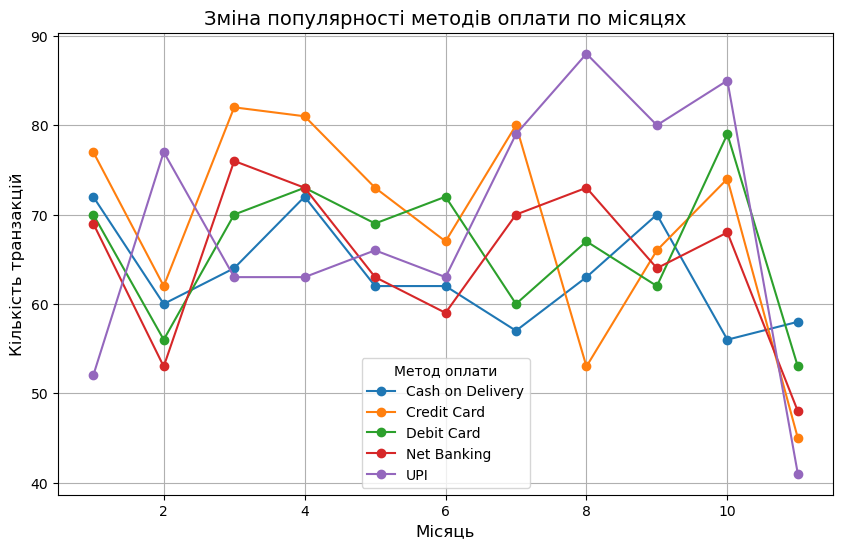

In [72]:
# –∫—ñ–ª—å–∫—ñ—Å—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π –∑–∞ –º–µ—Ç–æ–¥–∞–º–∏ –æ–ø–ª–∞—Ç–∏ –ø–æ –º—ñ—Å—è—Ü—è—Ö
payment_trends = df.pivot_table(
    index='month', 
    columns='payment_method', 
    values='user_id', 
    aggfunc='count'
).fillna(0)

payment_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("–ó–º—ñ–Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—ñ –º–µ—Ç–æ–¥—ñ–≤ –æ–ø–ª–∞—Ç–∏ –ø–æ –º—ñ—Å—è—Ü—è—Ö", fontsize=14)
plt.xlabel("–ú—ñ—Å—è—Ü—å", fontsize=12)
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç—Ä–∞–Ω–∑–∞–∫—Ü—ñ–π", fontsize=12)
plt.grid(True)
plt.legend(title="–ú–µ—Ç–æ–¥ –æ–ø–ª–∞—Ç–∏")
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ó –∞–Ω–∞–ª—ñ–∑—É –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—ñ –º–µ—Ç–æ–¥—ñ–≤ –æ–ø–ª–∞—Ç–∏ –ø–æ –º—ñ—Å—è—Ü—è—Ö –º–∏ –±–∞—á–∏–º–æ, —â–æ:
- –ú–µ—Ç–æ–¥ –æ–ø–ª–∞—Ç–∏ UPI (–º–∏—Ç—Ç—î–≤—ñ –ø–µ—Ä–µ–∫–∞–∑–∏ —á–µ—Ä–µ–∑ –¥–æ–¥–∞—Ç–æ–∫) –º–∞–≤ –ø—ñ–∫–æ–≤—ñ –∑–Ω–∞—á–µ–Ω–Ω—è —É —Å–µ—Ä–ø–Ω—ñ —Ç–∞ –∂–æ–≤—Ç–Ω—ñ.
- –ö—Ä–µ–¥–∏—Ç–Ω–∞ –∫–∞—Ä—Ç–∫–∞ (Credit Card) —Ç–∞–∫–æ–∂ –∑–∞–ª–∏—à–∞—î—Ç—å—Å—è –ø–æ–ø—É–ª—è—Ä–Ω–æ—é –ø—Ä–æ—Ç—è–≥–æ–º —É—Å—å–æ–≥–æ —Ä–æ–∫—É.
- –ù–∞–π–º–µ–Ω—à –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞–Ω–∏–º –º–µ—Ç–æ–¥–æ–º –æ–ø–ª–∞—Ç–∏ —î –≥–æ—Ç—ñ–≤–∫–∞ –ø—Ä–∏ –¥–æ—Å—Ç–∞–≤—Ü—ñ (Cash on Delivery), —â–æ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –∑—Ä—É—á–Ω—ñ—Å—Ç—å –±–µ–∑–≥–æ—Ç—ñ–≤–∫–æ–≤–∏—Ö –ø–ª–∞—Ç–µ–∂—ñ–≤ —Ç–∞ –±—ñ–ª—å—à—É –¥–æ–≤—ñ—Ä—É –¥–æ –æ–Ω–ª–∞–π–Ω-–æ–ø–ª–∞—Ç.

## 6. –ß–∏ —î –∫–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ —Ü—ñ–Ω–æ—é –∑–Ω–∏–∂–∫–æ—é —Ç–∞ –æ–±—Å—è–≥–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤?

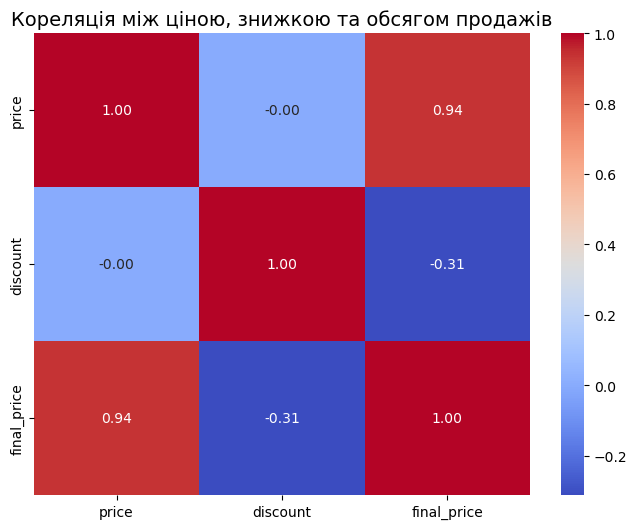

In [76]:
# –æ–±–∏—Ä–∞—î–º–æ –ø–æ—Ç—Ä—ñ–±–Ω—ñ –∫–æ–ª–æ–Ω–∫–∏
correlation_data = df[['price', 'discount', 'final_price']]

# —Ä–æ–∑—Ä–∞—Ö–æ–≤—É—î–º–æ –∫–æ—Ä–µ–ª—è—Ü—ñ—é
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("–ö–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ —Ü—ñ–Ω–æ—é, –∑–Ω–∏–∂–∫–æ—é —Ç–∞ –æ–±—Å—è–≥–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤", fontsize=14)
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
- –ö–æ—Ä–µ–ª—è—Ü—ñ—è –∫—ñ–Ω—Ü–µ–≤–æ—ó —Ü—ñ–Ω–∏ –¥–æ –ø–æ—á–∞—Ç–∫–æ–≤–æ—ó —Ü—ñ–Ω–∏ 0.94.
–í–∏—Å–æ–∫–∞ –ø–æ–∑–∏—Ç–∏–≤–Ω–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è –æ–∑–Ω–∞—á–∞—î, —â–æ –∫—ñ–Ω—Ü–µ–≤–∞ —Ü—ñ–Ω–∞ —Å–∏–ª—å–Ω–æ –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ –ø–æ—á–∞—Ç–∫–æ–≤–æ—ó —Ü—ñ–Ω–∏. –¶–µ –ª–æ–≥—ñ—á–Ω–æ, –∞–¥–∂–µ –∫—ñ–Ω—Ü–µ–≤–∞ —Ü—ñ–Ω–∞ —Ä–æ–∑—Ä–∞—Ö–æ–≤—É—î—Ç—å—Å—è —è–∫ –ø–æ—á–∞—Ç–∫–æ–≤–∞ —Ü—ñ–Ω–∞ –∑–∞ –≤–∏—Ä–∞—Ö—É–≤–∞–Ω–Ω—è–º –∑–Ω–∏–∂–∫–∏.

- –ö–æ—Ä–µ–ª—è—Ü—ñ—è –¥–∏—Å–∫–æ–Ω—Ç—É –¥–æ —Ñ—ñ–Ω–∞–ª—å–Ω–æ—ó —Ü—ñ–Ω–∏ -0.31.
–ù–µ–≥–∞—Ç–∏–≤–Ω–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—è —Å–µ—Ä–µ–¥–Ω—å–æ—ó —Å–∏–ª–∏ –æ–∑–Ω–∞—á–∞—î, —â–æ –∑—ñ –∑–±—ñ–ª—å—à–µ–Ω–Ω—è–º –¥–∏—Å–∫–æ–Ω—Ç—É –∫—ñ–Ω—Ü–µ–≤–∞ —Ü—ñ–Ω–∞ –∑–Ω–∏–∂—É—î—Ç—å—Å—è. –ß–∏–º –±—ñ–ª—å—à–∞ –∑–Ω–∏–∂–∫–∞, —Ç–∏–º –º–µ–Ω—à–µ –ø–æ–∫—É–ø–µ—Ü—å –∑–∞–ø–ª–∞—Ç–∏—Ç—å –∑–∞ —Ç–æ–≤–∞—Ä.

## 7. –ü–µ—Ä–µ–≤—ñ—Ä–∏—Ç–∏ –∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –æ–±—Å—è–≥—É –ø—Ä–æ–¥–∞–∂—ñ–≤ –≤—ñ–¥ –¥–∏—Å–∫–æ–Ω—Ç—É

- –ú–æ–∂–ª–∏–≤–æ, –≤–∏—Å–æ–∫—ñ –∑–Ω–∏–∂–∫–∏ –∑–±—ñ–ª—å—à—É—é—Ç—å –æ–±—Å—è–≥–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤?

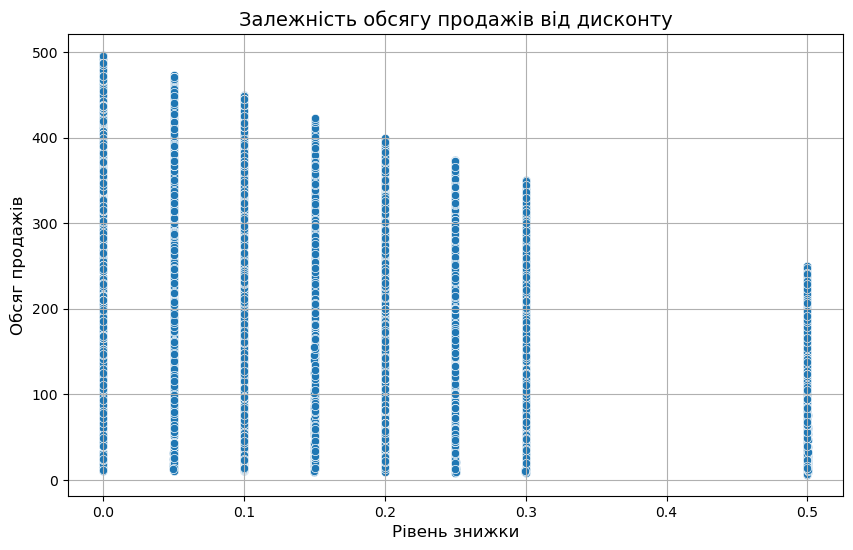

In [80]:
# —Ä–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ —Ä—ñ–≤–Ω—è –∑–Ω–∏–∂–∫–∏
df['discount_rate'] = (df['price'] - df['final_price']) / df['price']
sales_by_discount = df.groupby(pd.cut(df['discount_rate'], bins=[0, 0.1, 0.3, 0.5, 1]))['final_price'].sum()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['discount_rate'], y=df['final_price'])
plt.title("–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –æ–±—Å—è–≥—É –ø—Ä–æ–¥–∞–∂—ñ–≤ –≤—ñ–¥ –¥–∏—Å–∫–æ–Ω—Ç—É", fontsize=14)
plt.xlabel("–†—ñ–≤–µ–Ω—å –∑–Ω–∏–∂–∫–∏", fontsize=12)
plt.ylabel("–û–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤", fontsize=12)
plt.grid(True)
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ù–∞–π–±—ñ–ª—å—à–∏–π –æ–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø—Ä–∏–ø–∞–¥–∞—î –Ω–∞ —Ç–æ–≤–∞—Ä–∏ –∑ 0%, 5% —Ç–∞ 10% –∑–Ω–∏–∂–∫–æ—é.
- 0% (–±–µ–∑ –∑–Ω–∏–∂–∫–∏): –¶—ñ —Ç–æ–≤–∞—Ä–∏ –º–∞—é—Ç—å –ø–æ–ø–∏—Ç –±–µ–∑ –∑–Ω–∏–∂–æ–∫, —â–æ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ —ó—Ö–Ω—é –≤–∏—Å–æ–∫—É –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å –∞–±–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω—É —Ü—ñ–Ω—É.
- 5% —Ç–∞ 10% –∑–Ω–∏–∂–∫–∞: –ù–µ–≤–µ–ª–∏–∫—ñ –∑–Ω–∏–∂–∫–∏ —Å—Ç–≤–æ—Ä—é—é—Ç—å –≤–∏–≥–æ–¥—É –¥–ª—è –ø–æ–∫—É–ø—Ü—ñ–≤ –±–µ–∑ –∑–Ω–∞—á–Ω–∏—Ö –≤—Ç—Ä–∞—Ç –¥–ª—è –∫–æ–º–ø–∞–Ω—ñ—ó, —â–æ —Ä–æ–±–∏—Ç—å —ó—Ö –ø–æ–ø—É–ª—è—Ä–Ω–∏–º–∏.
- –ó–Ω–∏–∂–µ–Ω–Ω—è –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø—ñ—Å–ª—è 10% –∑–Ω–∏–∂–∫–∏: –º–æ–∂–ª–∏–≤–æ, –ø–æ–∫—É–ø—Ü—ñ —á–µ–∫–∞—é—Ç—å –Ω–∞ –±—ñ–ª—å—à—ñ –∑–Ω–∏–∂–∫–∏, –∞ —Ç–∞–∫–æ–∂ –≤–µ–ª–∏–∫–∞ –∑–Ω–∏–∂–∫–∞ –º–æ–∂–µ –≤–∏–∫–ª–∏–∫–∞—Ç–∏ –∞—Å–æ—Ü—ñ–∞—Ü—ñ—ó –∑ –Ω–∏–∑—å–∫–æ—é —è–∫—ñ—Å—Ç—é —Ç–æ–≤–∞—Ä—É.

–¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ –ø–æ–º—ñ—Ä–Ω—ñ –∑–Ω–∏–∂–∫–∏ –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—à–µ —Å—Ç–∏–º—É–ª—é—é—Ç—å –ø–æ–ø–∏—Ç, –Ω—ñ–∂ –≤–µ–ª–∏–∫—ñ.

## 8. –Ø–∫–∞ —Å–µ—Ä–µ–¥–Ω—è –≤–∞—Ä—Ç—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö

- –ü–æ—Ä—ñ–≤–Ω—è—î–º–æ —Å–µ—Ä–µ–¥–Ω—ñ —Ü—ñ–Ω–∏ –¥–ª—è –≤–∏—è–≤–ª–µ–Ω–Ω—è –ø—Ä–µ–º—ñ–∞–ª—å–Ω–∏—Ö —Ç–∞ –±—é–¥–∂–µ—Ç–Ω–∏—Ö —Ç–æ–≤–∞—Ä—ñ–≤.

In [84]:
# –æ–±—á–∏—Å–ª–µ–Ω–Ω—è —Å–µ—Ä–µ–¥–Ω—å–æ—ó –≤–∞—Ä—Ç–æ—Å—Ç—ñ —Ç–æ–≤–∞—Ä—ñ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö
avg_price_by_category = df.groupby('category')['price'].mean().round(2).sort_values(ascending=False)
avg_price_by_category

category
Clothing          263.12
Books             259.12
Sports            258.62
Beauty            252.74
Electronics       251.65
Home & Kitchen    249.26
Toys              248.96
Name: price, dtype: float64

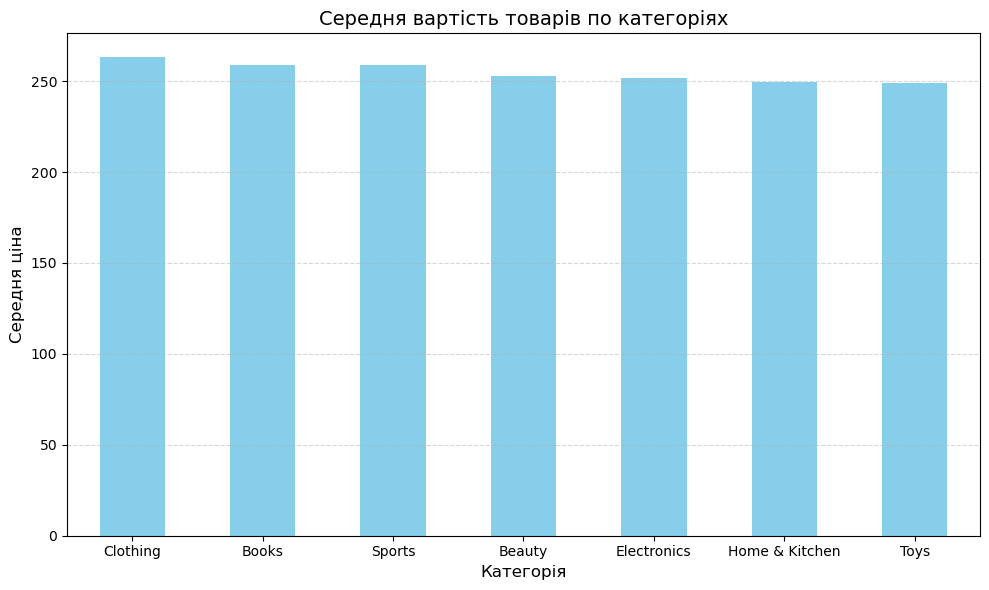

In [86]:
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title("–°–µ—Ä–µ–¥–Ω—è –≤–∞—Ä—Ç—ñ—Å—Ç—å —Ç–æ–≤–∞—Ä—ñ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö", fontsize=14)
plt.xlabel("–ö–∞—Ç–µ–≥–æ—Ä—ñ—è", fontsize=12)
plt.ylabel("–°–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–Ø–∫ –±–∞—á–∏–º–æ, —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –û–¥—è–≥ (263.12), –ö–Ω–∏–≥–∏ (259.12) —Ç–∞ –°–ø–æ—Ä—Ç (258.62) –∑–Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –Ω–∞ –æ–¥–Ω–æ–º—É —Ä—ñ–≤–Ω—ñ. –ù–∞–π–º–µ–Ω—à—É —Å–µ—Ä–µ–¥–Ω—é –≤–∞—Ä—Ç—ñ—Å—Ç—å –º–∞—î –∫–∞—Ç–µ–≥–æ—Ä—ñ—è –Ü–≥—Ä–∞—à–∫–∏ ‚Äî 248.96. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ —Ç–µ, —â–æ —Ç–æ–≤–∞—Ä–∏ –≤ —Ü—ñ–π –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó —î –±—ñ–ª—å—à –¥–æ—Å—Ç—É–ø–Ω–∏–º–∏, —Ç–æ–¥—ñ —è–∫ —ñ–Ω—à—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –º–æ–∂–Ω–∞ –≤—ñ–¥–Ω–µ—Å—Ç–∏ –¥–æ —Å–µ—Ä–µ–¥–Ω—å–æ–≥–æ —Ü—ñ–Ω–æ–≤–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞.

–ú–∞–π–∂–µ –æ–¥–Ω–∞–∫–æ–≤–∞ —Å–µ—Ä–µ–¥–Ω—è —Ü—ñ–Ω–∞ —É –≤—Å—ñ—Ö –∫–∞—Ç–µ–≥–æ—Ä—ñ—è—Ö –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –æ–±–º–µ–∂–µ–Ω–Ω—è —Å–∏–Ω—Ç–µ—Ç–∏—á–Ω–∏—Ö –¥–∞–Ω–∏—Ö –∞–±–æ –≤—ñ–¥—Å—É—Ç–Ω—ñ—Å—Ç—å —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—ó –ø—Ä–æ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫. –¶–µ —É—Å–∫–ª–∞–¥–Ω—é—î –≤–∏–∑–Ω–∞—á–µ–Ω–Ω—è –ø—Ä–µ–º—ñ–∞–ª—å–Ω–∏—Ö —Ç–∞ –±—é–¥–∂–µ—Ç–Ω–∏—Ö —Ç–æ–≤–∞—Ä—ñ–≤, –æ—Å–∫—ñ–ª—å–∫–∏ –ø–æ–ø—É–ª—è—Ä–Ω—ñ—Å—Ç—å –ø—Ä–æ–¥—É–∫—Ç—ñ–≤ —Ç–∞ —ó—Ö —Ä–µ–∞–ª—å–Ω–∞ –≤–∞—Ä—Ç—ñ—Å—Ç—å –Ω–µ –≤—Ä–∞—Ö–æ–≤–∞–Ω—ñ –Ω–∞–ª–µ–∂–Ω–∏–º —á–∏–Ω–æ–º.

## 9. –Ø–∫–∏–π —Ç–æ–≤–∞—Ä –º–∞—î –Ω–∞–π–±—ñ–ª—å—à—É –∑–Ω–∏–∂–∫—É —Ç–∞ —è–∫ —Ü–µ –≤–ø–ª–∏–Ω—É–ª–æ –Ω–∞ –ø—Ä–æ–¥–∞–∂—ñ
- –ê–Ω–∞–ª—ñ–∑ –≤–ø–ª–∏–≤—É —Ä–æ–∑–º—ñ—Ä—É –∑–Ω–∏–∂–∫–∏ –Ω–∞ –æ–±—Å—è–≥–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤.

In [90]:
df['discount'].sort_values().unique()

array([ 0,  5, 10, 15, 20, 25, 30, 50])

In [92]:
# –∑–Ω–∞–π–¥–µ–º–æ —Ç–æ–≤–∞—Ä –∑ –Ω–∞–π–±—ñ–ª—å—à–æ—é –∑–Ω–∏–∂–∫–æ—é
max_discount_product = df.loc[df['discount'].idxmax()]

# –≤–∏–∑–Ω–∞—á–∏–º–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—é —Ç–æ–≤–∞—Ä—É –∑ –Ω–∞–π–±—ñ–ª—å—à–æ—é –∑–Ω–∏–∂–∫–æ—é
max_discount_category = max_discount_product['category']
max_discount_category

'Books'

In [94]:
# —Å—Ç–≤–æ—Ä—é—î–º–æ —Å–ø–∏—Å–æ–∫ –∑ —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Ä—ñ–≤–Ω—ñ–≤ –∑–Ω–∏–∂–∫–∏
discount_levels = [0, 5, 10, 15, 20, 25, 30, 50]

# –ø—ñ–¥—Ä–∞—Ö—É—î–º–æ –æ–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤ –¥–ª—è –∫–æ–∂–Ω–æ–≥–æ —Ä—ñ–≤–Ω—è –∑–Ω–∏–∂–∫–∏
sales_books_by_discount_level = {}

for discount in discount_levels:
    sales_books_by_discount_level[f'{discount}%'] = df[(df['category'] == 'Books') & (df['discount'] == discount)]['final_price'].sum()

sales_books_by_discount_level

{'0%': 16824.45,
 '5%': 15630.22,
 '10%': 14421.900000000001,
 '15%': 15425.560000000001,
 '20%': 16562.11,
 '25%': 12174.110000000002,
 '30%': 10909.99,
 '50%': 9201.01}

In [96]:
sales_books_by_discount_level = {
    '0%': df[(df['category'] == 'Books') & (df['discount'] == 0)]['final_price'].sum(),
    '5%': df[(df['category'] == 'Books') & (df['discount'] == 5)]['final_price'].sum(),
    '10%': df[(df['category'] == 'Books') & (df['discount'] == 10)]['final_price'].sum(),
    '15%': df[(df['category'] == 'Books') & (df['discount'] == 15)]['final_price'].sum(),
    '20%': df[(df['category'] == 'Books') & (df['discount'] == 20)]['final_price'].sum(),
    '25%': df[(df['category'] == 'Books') & (df['discount'] == 25)]['final_price'].sum(),
    '30%': df[(df['category'] == 'Books') & (df['discount'] == 30)]['final_price'].sum(),
    '50%': df[(df['category'] == 'Books') & (df['discount'] == 50)]['final_price'].sum()
}

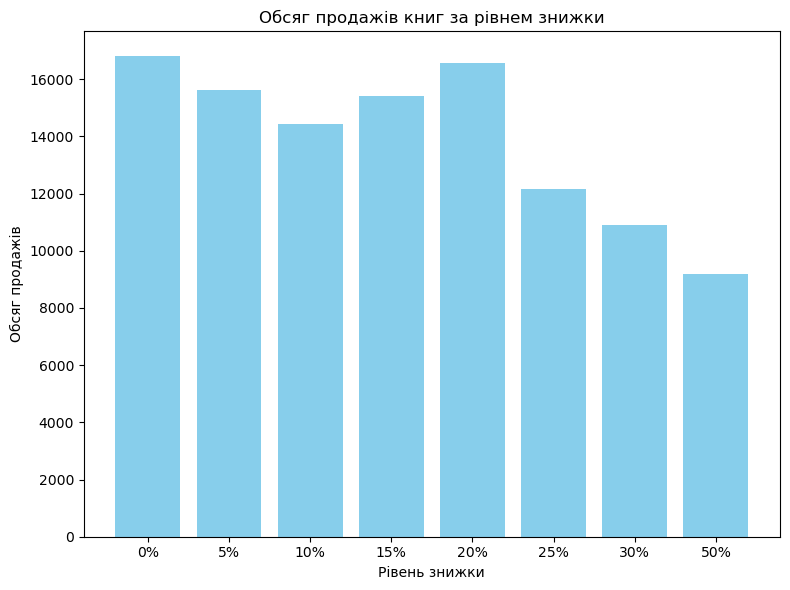

In [98]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sales_books_by_discount_level.keys(), sales_books_by_discount_level.values(), color='skyblue')
ax.set_xlabel('–†—ñ–≤–µ–Ω—å –∑–Ω–∏–∂–∫–∏')
ax.set_ylabel('–û–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤')
ax.set_title('–û–±—Å—è–≥ –ø—Ä–æ–¥–∞–∂—ñ–≤ –∫–Ω–∏–≥ –∑–∞ —Ä—ñ–≤–Ω–µ–º –∑–Ω–∏–∂–∫–∏')

# –ü–æ–∫–∞–∑–∞—Ç–∏ –≥—Ä–∞—Ñ—ñ–∫
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ó –∞–Ω–∞–ª—ñ–∑—É –ø—Ä–æ–¥–∞–∂—ñ–≤ –≤–∏–¥–Ω–æ, —â–æ –∫–∞—Ç–µ–≥–æ—Ä—ñ—è `–ö–Ω–∏–≥–∏` –º–∞—î —Ä–µ–∫–æ—Ä–¥–Ω—ñ –ø–æ–∫–∞–∑–Ω–∏–∫–∏ –∑–∞ –æ–±—Å—è–≥–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤ —É –∂–æ–≤—Ç–Ω—ñ —Ç–∞ –∑–∞–π–º–∞—î –¥—Ä—É–≥–µ –º—ñ—Å—Ü–µ –∑–∞ –ø—Ä–∏–±—É—Ç–∫–æ–º —Å–µ—Ä–µ–¥ —É—Å—ñ—Ö –∫–∞—Ç–µ–≥–æ—Ä—ñ–π. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–π –≤–ø–ª–∏–≤ –∑–Ω–∏–∂–æ–∫ –Ω–∞ –æ–±—Å—è–≥–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤ —Å–∞–º–µ –≤ —Ü—ñ–π –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó. –ó–Ω–∏–∂–∫–∏ —Å—Ç–∏–º—É–ª—é—é—Ç—å –ø–æ–ø–∏—Ç, –∑–±—ñ–ª—å—à—É—é—á–∏ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫—É–ø–æ–∫, —â–æ —Ä–æ–±–∏—Ç—å —ó—Ö –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—é —Å—Ç—Ä–∞—Ç–µ–≥—ñ—î—é –¥–ª—è –ø—ñ–¥–≤–∏—â–µ–Ω–Ω—è –ø—Ä–æ–¥–∞–∂—ñ–≤ –∫–Ω–∏–≥.

–ù–∞–π–±—ñ–ª—å—à–∏–π –ø—Ä–∏–±—É—Ç–æ–∫ —Å–ø–æ—Å—Ç–µ—Ä—ñ–≥–∞—î—Ç—å—Å—è –ø—Ä–∏ –∑–Ω–∏–∂–∫–∞—Ö —É –º–µ–∂–∞—Ö 0-5% —Ç–∞ 15-20%, —â–æ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –∑–∞—Å—Ç–æ—Å—É–≤–∞–Ω–Ω—è –ø–æ–º—ñ—Ä–Ω–∏—Ö –∑–Ω–∏–∂–æ–∫ –¥–ª—è –∑–∞–ª—É—á–µ–Ω–Ω—è –ø–æ–∫—É–ø—Ü—ñ–≤ –±–µ–∑ –∑–Ω–∞—á–Ω–∏—Ö –≤—Ç—Ä–∞—Ç —É –º–∞—Ä–∂—ñ.

## 10. –Ø–∫–∏–π –¥–µ–Ω—å —Ç–∏–∂–Ω—è –Ω–∞–π–ø—Ä–∏–±—É—Ç–∫–æ–≤—ñ—à–∏–π?
- –í–∏–∑–Ω–∞—á–∏—Ç–∏ –¥–Ω—ñ –∑ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–º–∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏.

In [102]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['day_of_week'] = df['purchase_date'].dt.day_name()

sales_by_day = df.groupby('day_of_week')['final_price'].sum()
sales_by_day_sorted = sales_by_day.sort_values(ascending=False)

sales_by_day_sorted

day_of_week
Sunday       115282.24
Thursday     113187.49
Tuesday      112299.98
Monday       108624.43
Friday       106048.81
Wednesday    103007.68
Saturday      98827.45
Name: final_price, dtype: float64

#### –í–∏—Å–Ω–æ–≤–æ–∫:
–ù–µ–¥—ñ–ª—è —î –Ω–∞–π–ø—Ä–∏–±—É—Ç–∫–æ–≤—ñ—à–∏–º –¥–Ω–µ–º –∑ –æ–±—Å—è–≥–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤ 115282.24, —Ü–µ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ —Ç–µ, —â–æ –∫–ª—ñ—î–Ω—Ç–∏ —á–∞—Å—Ç—ñ—à–µ –∑–¥—ñ–π—Å–Ω—é—é—Ç—å –ø–æ–∫—É–ø–∫–∏ –≤ –∫—ñ–Ω—Ü—ñ —Ç–∏–∂–Ω—è, –º–æ–∂–ª–∏–≤–æ, —á–µ—Ä–µ–∑ –±—ñ–ª—å—à–µ –≤—ñ–ª—å–Ω–æ–≥–æ —á–∞—Å—É –∞–±–æ —Å–ø–µ—Ü—ñ–∞–ª—å–Ω—ñ –ø—Ä–æ–ø–æ–∑–∏—Ü—ñ—ó –Ω–∞ –≤–∏—Ö—ñ–¥–Ω–∏—Ö. –¶—é —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—é –º–æ–∂–Ω–∞ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ –¥–ª—è –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—ó –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–∏—Ö —Å—Ç—Ä–∞—Ç–µ–≥—ñ–π, –Ω–∞–ø—Ä–∏–∫–ª–∞–¥, –∑–±—ñ–ª—å—à–∏—Ç–∏ –∑–Ω–∏–∂–∫–∏ –∞–±–æ –∑–∞–ø—É—Å—Ç–∏—Ç–∏ –∞–∫—Ü—ñ—ó –≤ –Ω–µ–¥—ñ–ª—é –¥–ª—è –∑–∞–ª—É—á–µ–Ω–Ω—è —â–µ –±—ñ–ª—å—à–æ—ó –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø–æ–∫—É–ø—Ü—ñ–≤.

In [107]:
df.to_csv('cleaned_data.csv', index=False)

### –ó–∞–≥–∞–ª—å–Ω–∏–π –ø—ñ–¥—Å—É–º–æ–∫:
–ü—Ä–æ–≤–µ–¥–µ–Ω–∏–π –∞–Ω–∞–ª—ñ–∑ –¥–æ–∑–≤–æ–ª–∏–≤ –≥–ª–∏–±—à–µ –∑—Ä–æ–∑—É–º—ñ—Ç–∏ –¥–∏–Ω–∞–º—ñ–∫—É –æ–Ω–ª–∞–π–Ω-–ø—Ä–æ–¥–∞–∂—ñ–≤ —ñ –∫–ª—ñ—î–Ω—Ç—Å—å–∫—É –ø–æ–≤–µ–¥—ñ–Ω–∫—É, –≤–∏—è–≤–∏–≤—à–∏ –∫—ñ–ª—å–∫–∞ –≤–∞–∂–ª–∏–≤–∏—Ö –∑–∞–∫–æ–Ω–æ–º—ñ—Ä–Ω–æ—Å—Ç–µ–π —ñ –ø–æ—Ç–µ–Ω—Ü—ñ–π–Ω–∏—Ö —Ç–æ—á–æ–∫ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è:

üìö **–ö–∞—Ç–µ–≥–æ—Ä—ñ—è ‚Äú–ö–Ω–∏–≥–∏‚Äù** –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä—É–≤–∞–ª–∞ —Å—Ç–∞–±—ñ–ª—å–Ω–æ –≤–∏—Å–æ–∫—ñ –ø—Ä–æ–¥–∞–∂—ñ, –∑ –ø—ñ–∫–æ–º —É –∂–æ–≤—Ç–Ω—ñ. –ü–æ–º—ñ—Ä–Ω—ñ –∑–Ω–∏–∂–∫–∏ —É **5‚Äì20%** –º–∞—é—Ç—å –Ω–∞–π–±—ñ–ª—å—à–∏–π –≤–ø–ª–∏–≤ –Ω–∞ –ø—Ä–∏–±—É—Ç–æ–∫ ‚Äî —Ü–µ –≤–∫–∞–∑—É—î –Ω–∞ –¥–æ—Ü—ñ–ª—å–Ω—ñ—Å—Ç—å –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è —Ç–∞–∫–∏—Ö –∑–Ω–∏–∂–æ–∫ —è–∫ —ñ–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—É —Å—Ç–∏–º—É–ª—é–≤–∞–Ω–Ω—è –ø–æ–ø–∏—Ç—É –±–µ–∑ —Å—É—Ç—Ç—î–≤–æ–≥–æ –∑–Ω–∏–∂–µ–Ω–Ω—è –º–∞—Ä–∂–∏–Ω–∞–ª—å–Ω–æ—Å—Ç—ñ.

üìÜ **–ù–µ–¥—ñ–ª—è** ‚Äî –Ω–∞–π–ø—Ä–∏–±—É—Ç–∫–æ–≤—ñ—à–∏–π –¥–µ–Ω—å —Ç–∏–∂–Ω—è. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è –∫—É–ø—ñ–≤–µ–ª—å–Ω–æ—ó –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ —É –≤–∏—Ö—ñ–¥–Ω—ñ, —â–æ –º–æ–∂–Ω–∞ –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ –ø—Ä–∏ –ø–ª–∞–Ω—É–≤–∞–Ω–Ω—ñ —Ä–µ–∫–ª–∞–º–Ω–∏—Ö –∫–∞–º–ø–∞–Ω—ñ–π, e-mail —Ä–æ–∑—Å–∏–ª–æ–∫ —á–∏ –∞–∫—Ü—ñ–π, –æ—Ä—ñ—î–Ω—Ç–æ–≤–∞–Ω–∏—Ö —Å–∞–º–µ –Ω–∞ –∫—ñ–Ω–µ—Ü—å —Ç–∏–∂–Ω—è.

üí≥ –í–∏—è–≤–ª–µ–Ω–æ **–Ω–∞–π–ø–æ–ø—É–ª—è—Ä–Ω—ñ—à—ñ –º–µ—Ç–æ–¥–∏ –æ–ø–ª–∞—Ç–∏**, —â–æ –¥–æ–ø–æ–º–æ–∂–µ –æ–ø—Ç–∏–º—ñ–∑—É–≤–∞—Ç–∏ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—Ü—å–∫–∏–π –¥–æ—Å–≤—ñ–¥ —ñ –∑–º–µ–Ω—à–∏—Ç–∏ –≤—ñ–¥–º–æ–≤–∏ –Ω–∞ –µ—Ç–∞–ø—ñ –æ—Ñ–æ—Ä–º–ª–µ–Ω–Ω—è –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è.

üîé –ù–∞ –æ—Å–Ω–æ–≤—ñ –æ—Ç—Ä–∏–º–∞–Ω–∏—Ö –¥–∞–Ω–∏—Ö –º–æ–∂–Ω–∞ —Å—Ñ–æ—Ä–º—É–≤–∞—Ç–∏ **—Ç–∞—Ä–≥–µ—Ç–æ–≤–∞–Ω—ñ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ñ —Å—Ç—Ä–∞—Ç–µ–≥—ñ—ó**, –∑–æ–∫—Ä–µ–º–∞:
- –ó–∞–ø—É—Å–∫ –ø–µ—Ä—Å–æ–Ω–∞–ª—ñ–∑–æ–≤–∞–Ω–∏—Ö –ø—Ä–æ–º–æ–∞–∫—Ü—ñ–π –∑ —É—Ä–∞—Ö—É–≤–∞–Ω–Ω—è–º —Ç–∏–ø–æ–≤–∏—Ö —Ä—ñ–≤–Ω—ñ–≤ –∑–Ω–∏–∂–æ–∫, —è–∫—ñ ‚Äú–ø—Ä–∞—Ü—é—é—Ç—å‚Äù –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤;
- –ü—Ä–æ–º–æ –≤ –ø—ñ–∫–æ–≤—ñ –¥–Ω—ñ, –∫–æ–ª–∏ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å –∫–æ–Ω–≤–µ—Ä—Å—ñ—ó –≤–∏—â–∞;
- –§–æ—Ä–º—É–≤–∞–Ω–Ω—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü—ñ–π –Ω–∞ –æ—Å–Ω–æ–≤—ñ –ø–æ–≤–µ–¥—ñ–Ω–∫–∏ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤, —â–æ–± –∑–±—ñ–ª—å—à–∏—Ç–∏ —Å–µ—Ä–µ–¥–Ω—ñ–π —á–µ–∫.